In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy
from scipy.stats import linregress
import matplotlib
import bluepysnap as bp

In [2]:
%matplotlib widget

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
# Defines paths to the two simulation campaigns
s = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd'
s1 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/original/fixed/a9f782a3-1f22-4384-a122-430bc6b2323c'
s2 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/97d6aa07-db02-48c6-91c2-b3023ce5bdd0'
s3 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/ecb3ceed-f1bf-4ff0-8067-9bcfd0d2bf4f'
# s4 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/reduceInhibition/L23_BTC/da48f665-8b07-4aaf-a8f2-7a4c52f9df71'
# s5 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/reduceInhibition/L5_BTC/ebc8e94d-37ea-4bad-af06-32defff79dbb'
s6 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/af883cc4-40c0-4a0e-a179-a329c87fb346'
# s7 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/silent/69470182-2140-4078-9a09-6d7fe0d798e0'

s8 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL4Inh/871c007b-face-4656-b883-eed949ffbc92'

s9 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL5Inh/c2ba9f02-6a83-426f-a77f-fa766cd97e1b'

s10 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL6Inh/8bc7ca1f-45c8-47a2-a656-17e86bc2b384'

s11 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL23Inh/da78079e-3792-4ebd-a57b-f72ccd3fde11'
s12 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL23Exc/5bed2b84-e59a-4925-8556-d8c8a4815448'

s13 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL4Exc/d2632df2-f8f4-469d-bbe5-25c794668551'
s14 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5Exc/18ecf6a9-eae2-463e-a272-002907a40f07'
s15 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL6Exc/c9476d38-4af9-45a6-b1cf-77f3528f5b56'

s17 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL23Exc/d6d80bd8-f3ec-4f9c-a142-24d475412346'
s18 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL23Inh/7a688cef-aaec-4007-96ad-e9816549ed19'
s19 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL4Exc/6dbad045-83ca-45de-88f7-ec17e17c5dc3'
s20 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL4Inh/22249d06-3572-414c-a0aa-98828e1845ac'
s21 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5Exc/293e98bf-8010-4ab2-9fd0-352989d62a8a'
s22 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5Inh/e21b5a4e-e45b-4346-bd59-62f825b5b791'
s23 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL6Exc/032c2685-dc15-4f0d-a577-839673df0543'
s24 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL6Inh/5494e691-2a56-4228-aeaa-79fe165001e1'

s25 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5MC/79ff580a-035f-4355-bb5c-5f216f7a5dc8'
s26 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5LBC/088f41b4-dbe4-4613-aff2-378ebca9d77c'
s27 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5NBC/7bd2120f-64a1-4c33-8824-83cc7c03a974'

s28 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5MC/7ba59df7-74ad-415c-94b2-e0bebc400500'
s29 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5LBC/2d45c3db-8c1a-4bd9-a425-567d1dd0e22e'
s30 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5NBC/6176915e-1996-4761-9002-86e5ba2a97dc'



In [5]:
s31 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL1Inh/56add26b-6318-445b-b83e-f8461c9314ed'
s30 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL1Inh/9508592e-7855-4acb-9f7e-c3f276ec6500'
s32 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/testReference/94fc0a48-b6c2-4d0f-a659-4c9aab03dd01/'

In [6]:
sD = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/testReplay/a1a9ac12-0a91-432d-8a9e-00c94f19b024//'
sDR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/testReplay/28c64364-b4c8-442d-af7e-ca82e7f473f8'


In [7]:
sRef = '/gpfs/bbp.cscs.ch/project/proj83/scratch/home/isbister/post_physiology_2023/sim_data/debugging_tests/5_debugging_test_30-11-23/2919081d-a24b-4961-8f53-998f2af9f620/'

In [8]:
sPom = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/testReplay/pom/fba76444-1411-4c49-8b15-8afdf7d304b4'


In [9]:
sC = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/compressedTime/e56c337b-eeed-4a10-b584-03edb277421a'


In [10]:
sT = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/noThalamus/7f42ec58-030d-4a17-8cb0-d2c36616221a'
sTr = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noThalamus/7a9152d8-7fe1-41d3-9fea-703fe7b01f80'

In [11]:
def getHistByLayer(path_to_sims,bins=None):

    '''
    Thsi function iterates through all of the trials, and produces a spike time histogram for each layer, separately for excitatory and inhibitory cells. 
    Outputs a matrix of size nTrials x 2 x nLayers x nBins
    '''

    numSims = 10
    numLayers = 6
    numBins = 225
    bins = np.linspace(1975,2200,numBins+1)

    allSpikes = np.zeros([numSims,2,numLayers,numBins])
   
    for sim in range(numSims):

        s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

        c = s.circuit
        layerDF = list(c.nodes.get(group='hex_O1',properties=['layer','synapse_class']))[0][1].loc['S1nonbarrel_neurons']
    
        for layer in np.arange(1,numLayers+1):

            layerIds = list(layerDF[layerDF['layer']==layer].index)


            for classIdx, synClass in enumerate(['EXC','INH']):

                classIds = list(layerDF[layerDF['synapse_class']==synClass].index)

                selectedIds = np.intersect1d(layerIds,classIds)

            
                spikes = s.spikes['S1nonbarrel_neurons'].get(group=selectedIds,t_start=1975,t_stop=2200)

            
                if bins is None:
                    
                    spike_hist,bins = np.histogram(list(spikes.index),bins=numBins)

    
                else:
    
                    spike_hist,_ = np.histogram(list(spikes.index),bins=bins)
            
                allSpikes[sim,classIdx,layer-1] = spike_hist


    return allSpikes, bins

In [10]:
spikes_original, bins = getHistByLayer(s1)

In [41]:
spikes = np.sum(spikes_original,axis=0)

In [42]:
spikes.shape

(2, 6, 225)

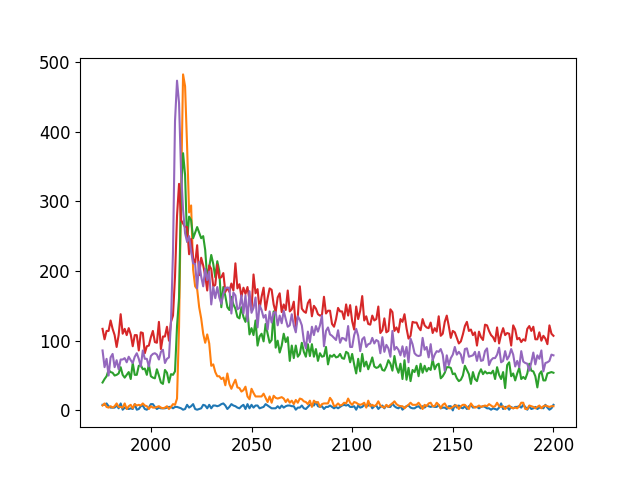

In [50]:
plt.figure()
for i in np.arange(1,6):
    plt.plot(bins[1:],spikes[0,i])

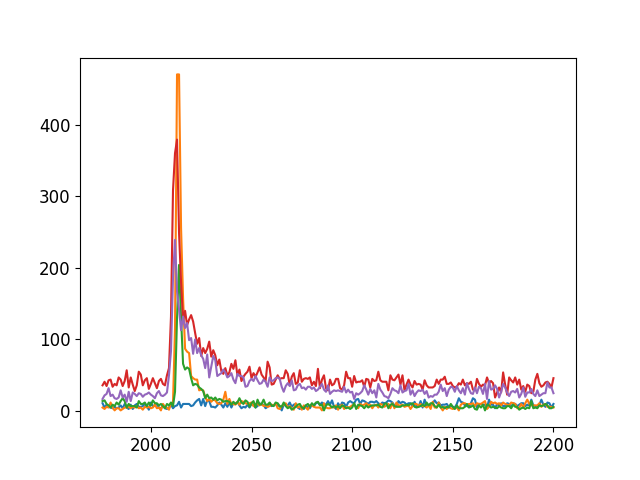

In [51]:
plt.figure()
for i in np.arange(1,6):
    plt.plot(bins[1:],spikes[1,i])

In [26]:
import h5py

    
# spikeFile = h5py.File(sRef+'/0/reporting/spikes.h5')

# if i == 0:
#     refSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
# else:
#     refSpikes = np.hstack((refSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
    
# spikeFile.close()

i = 0
        
spikeFile = h5py.File(s1+'/0/reporting/spikes.h5')
if i == 0:
    origSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
else:
    origSpikes = np.hstack((origSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
spikeFile.close()

spikeFile = h5py.File(s+'/0/reporting/spikes.h5')
if i == 0:
    rewiredSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
else:
    rewiredSpikes = np.hstack((rewiredSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
spikeFile.close()


In [28]:
rewiredSpikes

array([   43.925     ,    45.175     ,    45.175     , ...,
       11999.85000014, 11999.90000014, 11999.90000014])

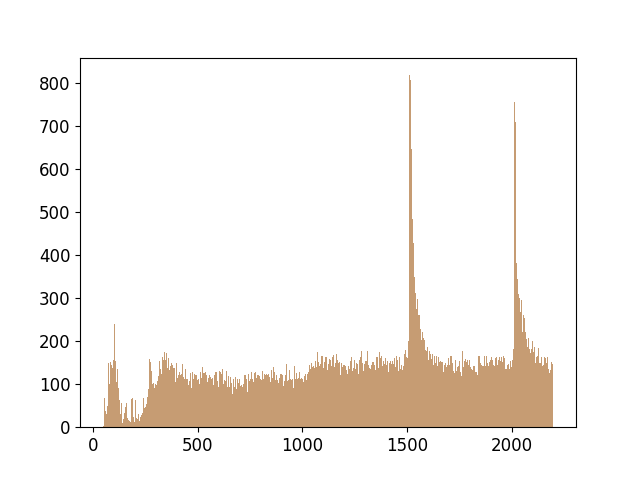

In [32]:
plt.figure()
# plt.hist(refSpikes,bins=500,alpha=0.1)

plt.hist(origSpikes,bins=500,alpha=0.5)

plt.hist(rewiredSpikes[rewiredSpikes<2200],bins=500,alpha=0.5)


plt.show()

In [9]:
bins = (bins[:-1]+bins[1:])/2

In [12]:
time = np.linspace(-25,200,22000-19750)

In [13]:
def meanAndCI(EEGs):

    '''
    Given a matrix of EEG or spike histograms for each trial, finds the mean and 95% CI over trials
    '''

    mean = np.mean(EEGs,axis=0)

    lowerbound = scipy.stats.t.ppf(0.05,9,mean,np.std(EEGs,axis=0))
    upperbound = scipy.stats.t.ppf(0.95,9,mean,np.std(EEGs,axis=0))

    return mean, lowerbound, upperbound

In [14]:
def getEEGsByTypes(path):

    '''
    Given a path ot a simulation, creates a dictionary of EEG signals for each cell type
    '''

    EEGs = {}

    for file in os.listdir(path+'/pkls'):
        t = file.split('.')[0].split('g')[1]
        
        EEGs[t] = pd.read_pickle(path+'/pkls/'+file).values[19750:22000,0] # For memory reasons, we extract only a portion of the signal

    return EEGs

In [15]:
def getEEGByLayer(path_to_sims):

    '''
    Iterates over all trials, and produces a matrix of the EEG contributions of each layer, for excitatory and inhibitory cells separately
    Outputs a matrix of size nTrials x 2 x nLayers x nTimeSteps
    '''

    duration = 22000-19750

    allEEGList = []

    numSuccess = 0

    for sim in range(10):

        # try:

        s = bp.Simulation( path_to_sims +'/'+str(sim) + '/simulation_config.json' )
        c = s.circuit
        
    
        eegEXC = np.zeros((7,duration))
        eegINH = np.zeros((7,duration))
    
        eegList = [eegEXC, eegINH]

        EEGsByTypes = getEEGsByTypes(path_to_sims +'/'+str(sim))

        if EEGsByTypes == {}:
            continue
        else:
            numSuccess += 1
    
        for mtype in np.sort(np.unique(list(EEGsByTypes.keys()))):
    
            synsDF = list(c.nodes.get(group=mtype,properties=['synapse_class']))[0][1].loc['S1nonbarrel_neurons'].iloc[0].values
    
            if synsDF=='EXC':
                synIdx = 0
            elif synsDF=='INH':
                synIdx = 1
    
            layer = int(mtype.split('_')[0].split('L')[1])
    
            if layer == 2 or layer == 3 or layer == 23:
                layer = 2
    
            eegList[synIdx][layer] += (EEGsByTypes[mtype]-np.mean(EEGsByTypes[mtype][:250])) # Removes baseline offset

        allEEGList.append(eegList)        

          # except:
    #         numFailures += 1

    # if numFailures > 0:
    #     print(numFailures)
    
    return np.array(allEEGList)

In [16]:
mean_layer_original.shape

NameError: name 'mean_layer_original' is not defined

In [17]:
def getEEGs(path):

    '''
    Given a path to simulations, outputs the EEG from each trial
    Outputs a matrix of size nTrials x nTimeSteps
    '''

    EEGs = list(np.zeros(10))

    for i in range(10):

        for file in os.listdir(path+'/'+str(i)+'/pkls'):

            EEGs[i] += pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[19750:22000,0] # For memory reasons, we extract only a portion of the signal

    
    EEGs = np.array(EEGs)
    EEGs -= np.mean(EEGs[:,:250],axis=-1)[:,np.newaxis] # Removes baseline offset

    return EEGs

In [18]:
def getStuff(path):

    EEGs = getEEGs(path)
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound

In [19]:
def getByLayer(path):

    EEGs = np.array(getEEGByLayer(path))
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound 

In [20]:
mean_layer, _, _= getByLayer(s)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [21]:
mean_layer_original, _, _= getByLayer(s1)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [22]:
mean_layer_compressed, _, _= getByLayer(sC)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [23]:
mean_layer_disconnected, _, _ = getByLayer(s3)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [24]:
mean_layer_disconnected_noThal, _, _ = getByLayer(sT)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [25]:
mean_layer_disconnected_noThalR, _, _ = getByLayer(sTr)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [26]:
#mean_layer, lowerbound_layer, upperbound_layer = getByLayer(s)

mean_layer_rewired, _, _= getByLayer(s2)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [27]:
mean_layer_rewired_reference, _, _= getByLayer(s32)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [28]:
mean_layer_rewiredD, lowerbound_layer_rewiredD, upperbound_layer_rewiredD = getByLayer(s6)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [29]:
mean_layer_test, _, _= getByLayer(sD)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [30]:

mean_layer_rewired_test, _, _= getByLayer(sDR)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [31]:

# mean_layer_rewiredDS, lowerbound_layer_rewiredDS, upperbound_layer_rewiredDS = getByLayer(s7)

mean_layer_L4, _, _ = getByLayer(s8)
mean_layer_L5, _, _ = getByLayer(s9)
mean_layer_L6, _, _ = getByLayer(s10)

mean_layer_L23Inh, _, _ = getByLayer(s11)
mean_layer_L23Exc, _, _ = getByLayer(s12)

mean_layer_L4Exc, _, _ = getByLayer(s13)
mean_layer_L5Exc, _, _ = getByLayer(s14)
mean_layer_L6Exc, _, _ = getByLayer(s15)



/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [34]:
mean_layer_L23ExcD, _,_ = getByLayer(s17)
mean_layer_L23InhD, _,_ = getByLayer(s18)
mean_layer_L4ExcD, _,_ = getByLayer(s19)
mean_layer_L4InhD, _,_ = getByLayer(s20)
mean_layer_L5ExcD, _,_ = getByLayer(s21)
mean_layer_L5InhD, _,_ = getByLayer(s22)
mean_layer_L6ExcD, _,_ = getByLayer(s23)
mean_layer_L6InhD, _,_ = getByLayer(s24)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [35]:
rewired_MC, _,_ = getByLayer(s25)

rewired_NBC, _,_ = getByLayer(s27)

D_MC, _,_ = getByLayer(s28)
D_LBC, _,_ = getByLayer(s29)
D_NBC, _,_ = getByLayer(s30)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [36]:
rewired_LBC, _,_ = getByLayer(s26)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [37]:
mean_layer_L1Inh, _,_ = getByLayer(s30)
mean_layer_L1InhD, _,_ = getByLayer(s31)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
plt.figure()
plt.plot(np.sum(mean_layer_L1InhD[0],axis=0))
plt.plot(np.sum(mean_layer_rewired_test[0],axis=0))

In [ ]:
inVivo = np.genfromtxt('../../EEG_InVivo.csv',delimiter=',')

In [ ]:
inVivo13 = np.genfromtxt('../../EEG_inVivo_P13.csv',delimiter=',')

In [ ]:
inVivo21 = np.genfromtxt('../../EEG_inVivo_P21.csv',delimiter=',')

In [ ]:
inVivoY = inVivo[:,1]/np.max((inVivo[:,1]))*np.max((np.sum(mean_layer_original[0],axis=0)))
inVivo13Y = inVivo13[:,1]/np.max((inVivo13[:,1]))*np.max((np.sum(mean_layer_original[0],axis=0)))
inVivo21Y = inVivo21[:,1]/np.max((inVivo21[:,1]))*np.max((np.sum(mean_layer_original[0],axis=0)))

# inVivoYR = inVivo[:,1]/np.max(np.abs(inVivo[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))
# inVivo13YR = inVivo13[:,1]/np.max(np.abs(inVivo13[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))
# inVivo21YR = inVivo21[:,1]/np.max(np.abs(inVivo21[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))

# inVivoYD = inVivo[:,1]/np.max(np.abs(inVivo[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))
# inVivo13YD = inVivo13[:,1]/np.max(np.abs(inVivo13[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))
# inVivo21YD = inVivo21[:,1]/np.max(np.abs(inVivo21[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))

In [38]:
L1Inh = mean_layer_original - mean_layer_L1Inh

L23Exc = mean_layer_original - mean_layer_L23Exc
L4Exc = mean_layer_original - mean_layer_L4Exc
L5Exc = mean_layer_original - mean_layer_L5Exc
L6Exc = mean_layer_original - mean_layer_L6Exc

L23Inh = mean_layer_original - mean_layer_L23Inh
L4Inh = mean_layer_original - mean_layer_L4
L5Inh = mean_layer_original - mean_layer_L5
L6Inh = mean_layer_original - mean_layer_L6

In [39]:
L1InhD = mean_layer_rewired - mean_layer_L1InhD

L23ExcD = mean_layer_rewired - mean_layer_L23ExcD
L4ExcD = mean_layer_rewired - mean_layer_L4ExcD
L5ExcD = mean_layer_rewired - mean_layer_L5ExcD
L6ExcD = mean_layer_rewired - mean_layer_L6ExcD

L23InhD = mean_layer_rewired - mean_layer_L23InhD
L4InhD = mean_layer_rewired - mean_layer_L4InhD
L5InhD = mean_layer_rewired - mean_layer_L5InhD
L6InhD = mean_layer_rewired - mean_layer_L6InhD


In [40]:
contrib_rewired_MC = mean_layer_rewired-rewired_MC
contrib_rewired_LBC = mean_layer_rewired-rewired_LBC
contrib_rewired_NBC = mean_layer_rewired-rewired_NBC

contrib_MC = mean_layer_original-D_MC
contrib_LBC = mean_layer_original-D_LBC
contrib_NBC = mean_layer_original-D_NBC

In [41]:
contrib_thal = mean_layer_original-mean_layer_disconnected_noThal
contrib_thalR = mean_layer_rewired-mean_layer_disconnected_noThalR

In [ ]:
numRewiredSims = 9

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(contrib_thal[0],axis=0),'r')

# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/10)

# plt.plot(inVivo[:,0],inVivoYR,'grey')
plt.plot(inVivo[:,0],inVivoY,'orange')

plt.legend(['Original','Thalamic \n-original','Rewired','Thalamic \n-rewired','In vivo'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/ThreeEEG.png',dpi=600)

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'--k')

plt.plot(time,np.sum(mean_layer_original[0],axis=0)+np.sum(mean_layer_original[1],axis=0),'grey')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)+np.sum(mean_layer_rewired[1],axis=0),'--',c='grey')


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['Original,\n excitatory','Rewired,\n excitatory','Original,\n all','Rewired,\n all'])

plt.tight_layout()
plt.savefig('../../figures/sumInhExc.png',dpi=600)

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_disconnected[0],axis=0),'r')
plt.plot(time,np.sum(contrib_thal[0],axis=0),'orange')
plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')

plt.legend(['Disconnected circuit','Thalamic contribution \n- original','Thalamic contribution \n- rewired'],handlelength=0.5)

# plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0),'r')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')
# plt.plot(time,np.sum(contrib_thalR[0],axis=0))
# plt.plot(time,np.sum(contrib_thal[0],axis=0))

# plt.plot(inVivo[:,0],inVivoYR,'grey')
# plt.plot(inVivo[:,0]-5,inVivoY,'orange')


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/thalamicContributions.png',dpi=600)

In [ ]:
plt.figure(figsize=(4,4))
# plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_compressed[0],axis=0),'pink')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/2.2,'cyan')

# plt.plot(inVivo[:,0],inVivoYR,'grey')

plt.legend(['S1HL reference','Lambda reference'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/reference.png',dpi=600)

In [ ]:
plt.figure(figsize=(4,4))
# plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_compressed[0],axis=0),'pink')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
# plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/2.2,'cyan')

# plt.plot(inVivo[:,0],inVivoYR,'grey')

plt.legend(['Compressed spiking','Rewired circuit'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/compressed.png',dpi=600)

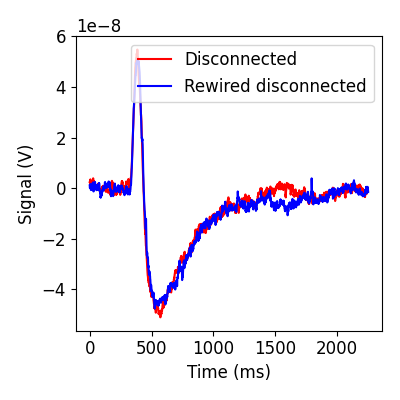

In [202]:
plt.figure(figsize=(4,4))
plt.plot(np.sum(mean_layer_disconnected[0],axis=0),'r')
plt.plot(np.sum(mean_layer_rewiredD[0],axis=0),'b')

plt.legend(['Disconnected','Rewired disconnected'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()


In [ ]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)
    plt.plot(time,mean_layer_original[0,layer,:],'k')
    
    plt.plot(time,contrib_thal[0,layer,:],'r')

    plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    plt.plot(time,contrib_thalR[0,layer,:],'brown')
    
    # plt.plot(mean_layer_rewiredD[0,layer,:])
    # plt.plot(mean_layer_rewiredDS[0,layer,:])
    # plt.plot(mean_layer_L23[0,layer,:])
    # plt.plot(mean_layer_L5[0,layer,:])
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)

plt.tight_layout()
plt.savefig('../../figures/EEGbyLayer.png',dpi=600)

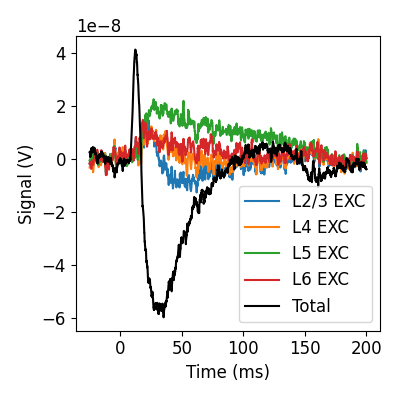

In [46]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution\n by presnyaptic layer')

plt.plot(time,np.sum(L23Exc[0],axis=0))
plt.plot(time,np.sum(L4Exc[0],axis=0))
plt.plot(time,np.sum(L5Exc[0],axis=0))
plt.plot(time,np.sum(L6Exc[0],axis=0))

# plt.plot(np.sum(L23Exc[0]/10,axis=0)+np.sum(L4Exc[0]/10,axis=0)+np.sum(L5Exc[0]/10,axis=0)+np.sum(L6Exc[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 EXC','L4 EXC','L5 EXC','L6 EXC','Total'])

plt.tight_layout()

plt.savefig('../../figures/CorticoCortical.png',dpi=600)

# plt.plot(np.sum(L23Inh[0],axis=0),'c')
# plt.plot(np.sum(L4Inh[0],axis=0),'c')
# plt.plot(np.sum(L5Inh[0],axis=0),'c')
# plt.plot(np.sum(L6Inh[0],axis=0),'c')

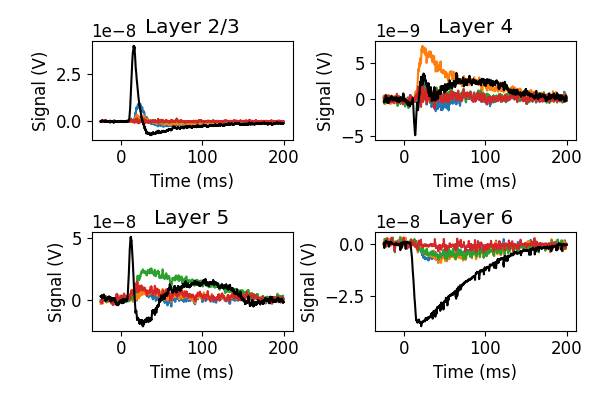

In [42]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)
    
    plt.plot(time,L23Exc[0,layer,:])
    
    plt.plot(time,L4Exc[0,layer,:])
    plt.plot(time,L5Exc[0,layer,:])
    plt.plot(time,L6Exc[0,layer,:])

    plt.plot(time,mean_layer_test[0,layer,:],'k')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalByLayer.png',dpi=600)

In [47]:
tIdx0 = np.argmin(np.abs(time-8))
tIdx1 = np.argmin(np.abs(time-17))

tIdx2 = np.argmin(np.abs(time-100))

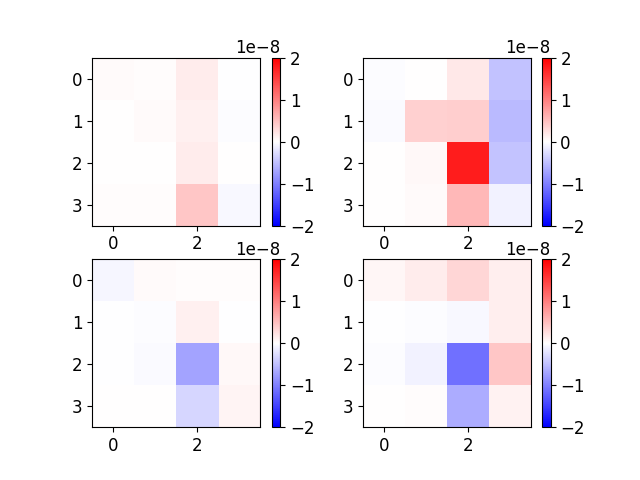

In [74]:
maxL23Exc = np.mean(L23Exc[0,:,tIdx0:tIdx1],axis=1)
maxL4Exc = np.mean(L4Exc[0,:,tIdx0:tIdx1],axis=1)
maxL5Exc = np.mean(L5Exc[0,:,tIdx0:tIdx1],axis=1)
maxL6Exc = np.mean(L6Exc[0,:,tIdx0:tIdx1],axis=1)

minL23Exc = np.mean(L23Exc[0,:,tIdx1:tIdx2],axis=1)
minL4Exc = np.mean(L4Exc[0,:,tIdx1:tIdx2],axis=1)
minL5Exc = np.mean(L5Exc[0,:,tIdx1:tIdx2],axis=1)
minL6Exc = np.mean(L6Exc[0,:,tIdx1:tIdx2],axis=1)

maxL23Inh = np.mean(L23Inh[0,:,tIdx0:tIdx1],axis=1)
maxL4Inh = np.mean(L4Inh[0,:,tIdx0:tIdx1],axis=1)
maxL5Inh = np.mean(L5Inh[0,:,tIdx0:tIdx1],axis=1)
maxL6Inh = np.mean(L6Inh[0,:,tIdx0:tIdx1],axis=1)

minL23Inh = np.mean(L23Inh[0,:,tIdx1:tIdx2],axis=1)
minL4Inh = np.mean(L4Inh[0,:,tIdx1:tIdx2],axis=1)
minL5Inh = np.mean(L5Inh[0,:,tIdx1:tIdx2],axis=1)
minL6Inh = np.mean(L6Inh[0,:,tIdx1:tIdx2],axis=1)

excMax = np.array([maxL23Exc,maxL4Exc,maxL5Exc,maxL6Exc])[:,[2,4,5,6]]
excMin = np.array([minL23Exc,minL4Exc,minL5Exc,minL6Exc])[:,[2,4,5,6]]
inhMax = np.array([maxL23Inh,maxL4Inh,maxL5Inh,maxL6Inh])[:,[2,4,5,6]]
inhMin = np.array([minL23Inh,minL4Inh,minL5Inh,minL6Inh])[:,[2,4,5,6]]

plt.figure()
plt.subplot(2,2,1)
plt.imshow(excMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(excMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(inhMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(inhMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

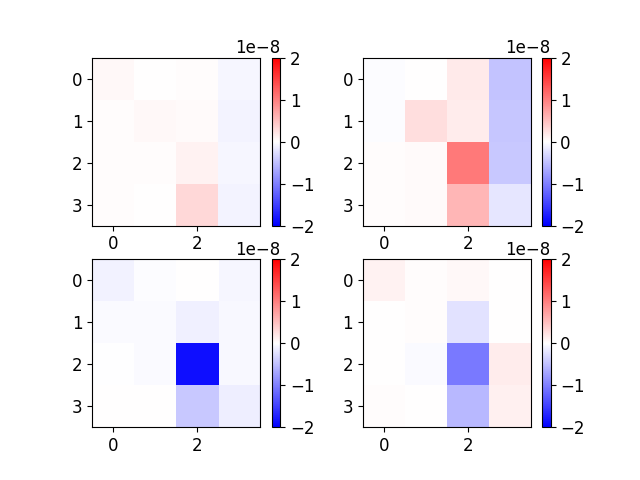

In [75]:
maxL23Exc = np.mean(L23ExcD[0,:,tIdx0:tIdx1],axis=1)
maxL4Exc = np.mean(L4ExcD[0,:,tIdx0:tIdx1],axis=1)
maxL5Exc = np.mean(L5ExcD[0,:,tIdx0:tIdx1],axis=1)
maxL6Exc = np.mean(L6ExcD[0,:,tIdx0:tIdx1],axis=1)

minL23Exc = np.mean(L23ExcD[0,:,tIdx1:tIdx2],axis=1)
minL4Exc = np.mean(L4ExcD[0,:,tIdx1:tIdx2],axis=1)
minL5Exc = np.mean(L5ExcD[0,:,tIdx1:tIdx2],axis=1)
minL6Exc = np.mean(L6ExcD[0,:,tIdx1:tIdx2],axis=1)

maxL23Inh = np.mean(L23InhD[0,:,tIdx0:tIdx1],axis=1)
maxL4Inh = np.mean(L4InhD[0,:,tIdx0:tIdx1],axis=1)
maxL5Inh = np.mean(L5InhD[0,:,tIdx0:tIdx1],axis=1)
maxL6Inh = np.mean(L6InhD[0,:,tIdx0:tIdx1],axis=1)

minL23Inh = np.mean(L23InhD[0,:,tIdx1:tIdx2],axis=1)
minL4Inh = np.mean(L4InhD[0,:,tIdx1:tIdx2],axis=1)
minL5Inh = np.mean(L5InhD[0,:,tIdx1:tIdx2],axis=1)
minL6Inh = np.mean(L6InhD[0,:,tIdx1:tIdx2],axis=1)

excMax = np.array([maxL23Exc,maxL4Exc,maxL5Exc,maxL6Exc])[:,[2,4,5,6]]
excMin = np.array([minL23Exc,minL4Exc,minL5Exc,minL6Exc])[:,[2,4,5,6]]
inhMax = np.array([maxL23Inh,maxL4Inh,maxL5Inh,maxL6Inh])[:,[2,4,5,6]]
inhMin = np.array([minL23Inh,minL4Inh,minL5Inh,minL6Inh])[:,[2,4,5,6]]

plt.figure()
plt.subplot(2,2,1)
plt.imshow(excMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(excMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(inhMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(inhMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar()

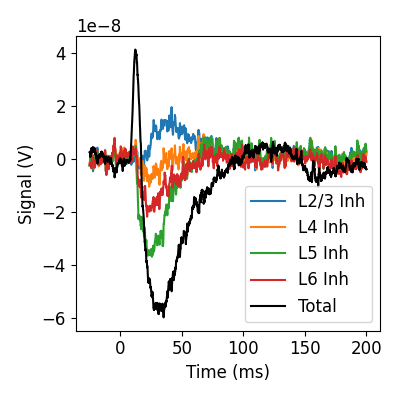

In [235]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

# plt.plot(time,np.sum(L1Inh[0]/10,axis=0))
plt.plot(time,np.sum(L23Inh[0],axis=0))
plt.plot(time,np.sum(L4Inh[0],axis=0))
plt.plot(time,np.sum(L5Inh[0],axis=0))
plt.plot(time,np.sum(L6Inh[0],axis=0))

# plt.plot(np.sum(L23Inh[0]/10,axis=0)+np.sum(L4Inh[0]/10,axis=0)+np.sum(L5Inh[0]/10,axis=0)+np.sum(L6Inh[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 Inh','L4 Inh','L5 Inh','L6 Inh','Total'])

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalInh.png',dpi=600)

# plt.plot(np.sum(L23Inh[0],axis=0),'c')
# plt.plot(np.sum(L4Inh[0],axis=0),'c')
# plt.plot(np.sum(L5Inh[0],axis=0),'c')
# plt.plot(np.sum(L6Inh[0],axis=0),'c')

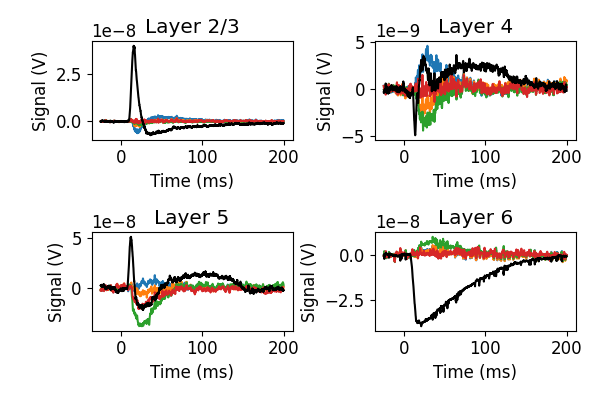

In [236]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)
    
    plt.plot(time,L23Inh[0,layer,:])
    
    plt.plot(time,L4Inh[0,layer,:])
    plt.plot(time,L5Inh[0,layer,:])
    plt.plot(time,L6Inh[0,layer,:])

    plt.plot(time,mean_layer_test[0,layer,:],'k')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalByLayerInh.png',dpi=600)
    

In [41]:
def optFun(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    inhTotal = coeffs[0]*np.sum(L23Inh[0],axis=0)+coeffs[1]*np.sum(L4Inh[0],axis=0)+coeffs[2]*np.sum(L5Inh[0],axis=0)+coeffs[3]*np.sum(L6Inh[0],axis=0)
    excTotal = coeffs[4]*np.sum(L23Exc[0],axis=0)+coeffs[5]*np.sum(L4Exc[0],axis=0)+coeffs[6]*np.sum(L5Exc[0],axis=0)+coeffs[7]*np.sum(L6Exc[0],axis=0)

    total = coeffs[8] *np.sum(disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    error = np.linalg.norm(inVivoY[:100]-newTotal[:100])

    return error

def optResult(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    inhTotal = coeffs[0]*np.sum(L23Inh[0],axis=0)+coeffs[1]*np.sum(L4Inh[0],axis=0)+coeffs[2]*np.sum(L5Inh[0],axis=0)+coeffs[3]*np.sum(L6Inh[0],axis=0)
    excTotal = coeffs[4]*np.sum(L23Exc[0],axis=0)+coeffs[5]*np.sum(L4Exc[0],axis=0)+coeffs[6]*np.sum(L5Exc[0],axis=0)+coeffs[7]*np.sum(L6Exc[0],axis=0)

    total = coeffs[8] *np.sum(disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    plt.figure(figsize=(4,4))
    plt.plot(inVivoX-5,inVivoY,'orange')
    plt.plot(time[timeIndex],newTotal,'k')
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    plt.legend(['In vivo','Optimized'])
    plt.tight_layout()
    plt.savefig('../../figures/optimization_rewired.png',dpi=600)



In [115]:
from scipy.optimize import minimize
coeffs = np.ones(9)
b = []
for i in range(9):
    b.append((.5,2))
result = minimize(optFun,coeffs,(time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,mean_layer_disconnected,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})


In [44]:
from scipy.optimize import minimize
coeffs = np.ones(9)
b = []
for i in range(9):
    b.append((.25,4))
result = minimize(optFun,coeffs,(time,L23InhD,L4InhD,L5InhD,L6InhD,L23ExcD,L4ExcD,L5ExcD,L6ExcD,mean_layer_rewiredD,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})


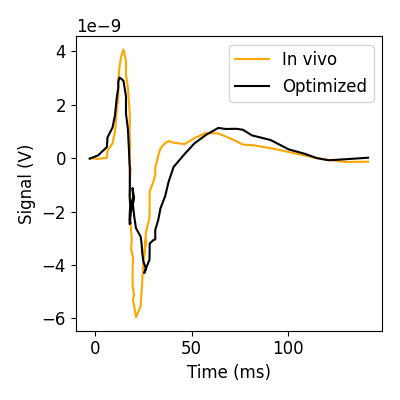

In [45]:
optResult(result['x'],time,L23InhD,L4InhD,L5InhD,L6InhD,L23ExcD,L4ExcD,L5ExcD,L6ExcD,mean_layer_rewiredD,inVivo[:,0],inVivoY)


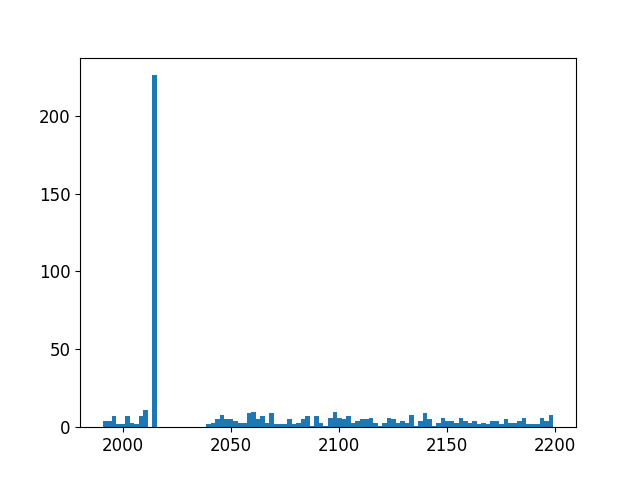

In [53]:
import h5py
f = h5py.File('/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/L5PeriTC_rewired/L5PeriTC_rewired_0.h5')
spiketimes = f['spikes']['S1nonbarrel_neurons']['timestamps'][:]
plt.figure()
plt.hist(spiketimes[spiketimes>1990],bins=100)
plt.show()

In [117]:
def optFun(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    coeffs0 = coeffs[0:7][:,np.newaxis]
    coeffs1 = coeffs[7:14][:,np.newaxis]
    coeffs2 = coeffs[14:21][:,np.newaxis]
    coeffs3 = coeffs[21:28][:,np.newaxis]

    coeffs4 = coeffs[28:35][:,np.newaxis]
    coeffs5 = coeffs[35:42][:,np.newaxis]
    coeffs6 = coeffs[42:49][:,np.newaxis]
    coeffs7 = coeffs[49:56][:,np.newaxis]

    coeffs8 = coeffs[56:63][:,np.newaxis]

    inhTotal = np.sum(coeffs0*L23Inh[0],axis=0)+np.sum(coeffs1*L4Inh[0],axis=0)+np.sum(coeffs2*L5Inh[0],axis=0)+np.sum(coeffs3*L6Inh[0],axis=0)
    excTotal = np.sum(coeffs4*L23Exc[0],axis=0)+np.sum(coeffs5*L4Exc[0],axis=0)+np.sum(coeffs6*L5Exc[0],axis=0)+np.sum(coeffs7*L6Exc[0],axis=0)

    total = np.sum(coeffs8 * disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    error = np.linalg.norm(inVivoY[:100]-newTotal[:100])

    return error

def optResult(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    coeffs0 = coeffs[0:7][:,np.newaxis]
    coeffs1 = coeffs[7:14][:,np.newaxis]
    coeffs2 = coeffs[14:21][:,np.newaxis]
    coeffs3 = coeffs[21:28][:,np.newaxis]

    coeffs4 = coeffs[28:35][:,np.newaxis]
    coeffs5 = coeffs[35:42][:,np.newaxis]
    coeffs6 = coeffs[42:49][:,np.newaxis]
    coeffs7 = coeffs[49:56][:,np.newaxis]

    coeffs8 = coeffs[56:63][:,np.newaxis]

    inhTotal = np.sum(coeffs0*L23Inh[0],axis=0)+np.sum(coeffs1*L4Inh[0],axis=0)+np.sum(coeffs2*L5Inh[0],axis=0)+np.sum(coeffs3*L6Inh[0],axis=0)
    excTotal = np.sum(coeffs4*L23Exc[0],axis=0)+np.sum(coeffs5*L4Exc[0],axis=0)+np.sum(coeffs6*L5Exc[0],axis=0)+np.sum(coeffs7*L6Exc[0],axis=0)

    total = np.sum(coeffs8 * disconnected[0],axis=0)/10+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    plt.figure()
    plt.plot(inVivoX-5,inVivoY)
    plt.plot(time[timeIndex],newTotal)



In [ ]:
from scipy.optimize import minimize
coeffs = np.ones(64)
b = []
for i in range(64):
    b.append((.5,2))
result = minimize(optFun,coeffs,(time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,mean_layer_disconnected,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})



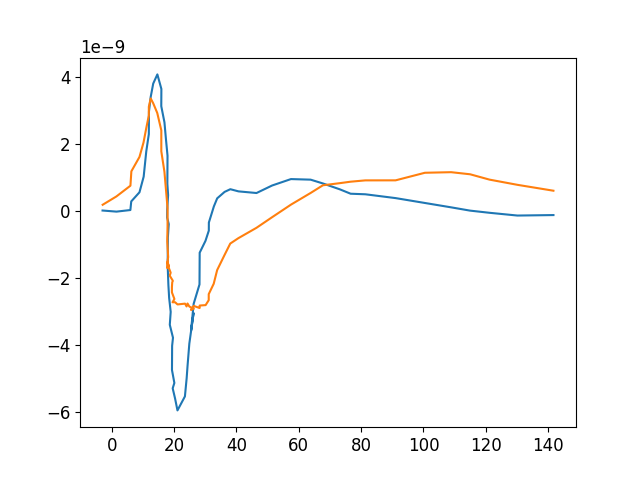

In [135]:
optResult(result['x'],time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,mean_layer_disconnected,inVivo[:,0],inVivoY)

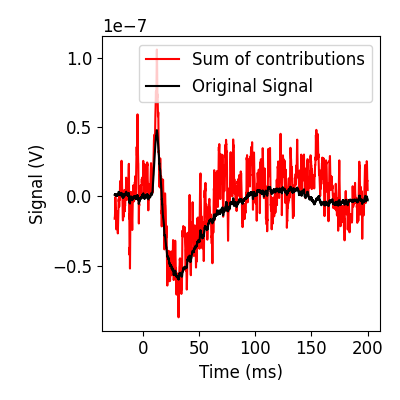

In [240]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
#inhTotal += np.sum(L23Inh[1],axis=0)+np.sum(L4Inh[1],axis=0)+np.sum(L5Inh[1],axis=0)+np.sum(L6Inh[1],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)
#excTotal += np.sum(L23Exc[1],axis=0)+np.sum(L4Exc[1],axis=0)+np.sum(L5Exc[1],axis=0)+np.sum(L6Exc[1],axis=0)

# plt.plot(excTotal)
t = np.sum(contrib_thal[0],axis=0)+inhTotal+excTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
# plt.plot(time,inhTotal,'r')
# plt.plot(time,excTotal)
plt.plot(time,t,'r')
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Original Signal'])
plt.tight_layout()
plt.savefig('../../figures/sumOfContributions.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

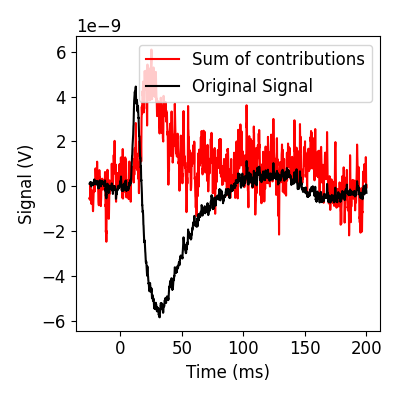

In [148]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
inhTotal += np.sum(L23Inh[1],axis=0)+np.sum(L4Inh[1],axis=0)+np.sum(L5Inh[1],axis=0)+np.sum(L6Inh[1],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)
excTotal += np.sum(L23Exc[1],axis=0)+np.sum(L4Exc[1],axis=0)+np.sum(L5Exc[1],axis=0)+np.sum(L6Exc[1],axis=0)

# plt.plot(excTotal)
t = excTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
# plt.plot(time,inhTotal,'r')
# plt.plot(time,excTotal)
plt.plot(time,t,'r')
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0],axis=0)+np.sum(mean_layer_original[1],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Original Signal'])
plt.tight_layout()
# plt.savefig('../../figures/sumOfContributions.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

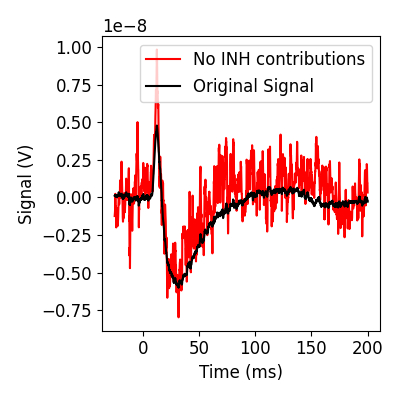

In [101]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)

# plt.plot(excTotal)
t = np.sum(mean_layer_disconnected[0],axis=0)+excTotal+inhTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
plt.plot(time,t,'r')
# plt.plot(inhTotal+excTotal)
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['No INH contributions','Original Signal'])
plt.tight_layout()
plt.savefig('../../figures/noInh.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

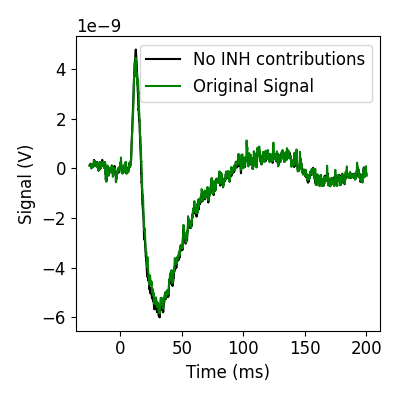

In [70]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_original[0],axis=0)+np.sum(mean_layer_original[1],axis=0),'green')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['No INH contributions','Total Signal'])
plt.tight_layout()
plt.savefig('../../figures/plusInh.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

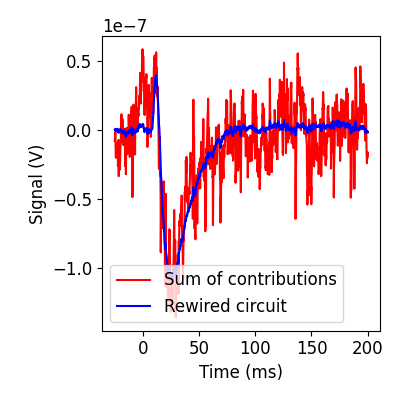

In [241]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L1InhD[0],axis=0)+np.sum(L23InhD[0],axis=0)+np.sum(L4InhD[0],axis=0)+np.sum(L5InhD[0],axis=0)+np.sum(L6InhD[0],axis=0)
excTotal = np.sum(L23ExcD[0],axis=0)+np.sum(L4ExcD[0],axis=0)+np.sum(L5ExcD[0],axis=0)+np.sum(L6ExcD[0],axis=0)

# plt.plot(time,inhTotal)
# plt.plot(time,excTotal)
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'r')
plt.plot(time,np.sum(contrib_thalR[0],axis=0)+inhTotal+excTotal,'r')
# plt.plot(inhTotal)
# plt.plot(np.sum(L23InhD[0]/10,axis=0))
# plt.plot(np.sum(L4InhD[0]/10,axis=0))
# plt.plot(np.sum(L5InhD[0]/10,axis=0))
# plt.plot(np.sum(L6InhD[0]/10,axis=0))
# plt.plot(excTotal)
# plt.plot(time,np.sum(mean_layer_disconnected[0],axis=0))
# plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0))
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
# plt.plot(np.sum(mean_layer_L6InhD[0],axis=0)/10)
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Rewired circuit'])
plt.tight_layout()
plt.savefig('../../figures/sumOfContributions_rewired.png',dpi=600)
# plt.plot()

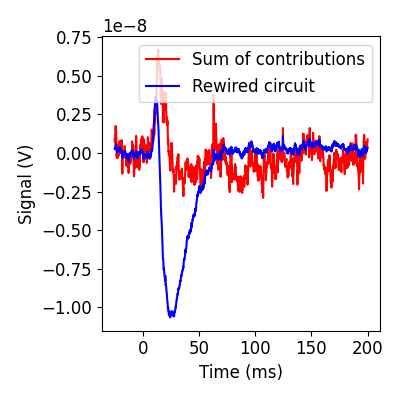

In [64]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23InhD[0],axis=0)+np.sum(L4InhD[0],axis=0)+np.sum(L5InhD[0],axis=0)+np.sum(L6InhD[0],axis=0)
excTotal = np.sum(L23ExcD[0],axis=0)+np.sum(L4ExcD[0],axis=0)+np.sum(L5ExcD[0],axis=0)+np.sum(L6ExcD[0],axis=0)

# plt.plot(inhTotal+excTotal)
plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0)+excTotal,'r')
# plt.plot(inhTotal)
# plt.plot(np.sum(L23InhD[0]/10,axis=0))
# plt.plot(np.sum(L4InhD[0]/10,axis=0))
# plt.plot(np.sum(L5InhD[0]/10,axis=0))
# plt.plot(np.sum(L6InhD[0]/10,axis=0))
# plt.plot(excTotal)
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')
# plt.plot(np.sum(mean_layer_rewired[0],axis=0),'k')
# plt.plot(np.sum(mean_layer_L6InhD[0],axis=0)/10)
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Rewired circuit'])
plt.tight_layout()
# plt.savefig('../../figures/sumOfContributions_rewired.png',dpi=600)
# plt.plot()

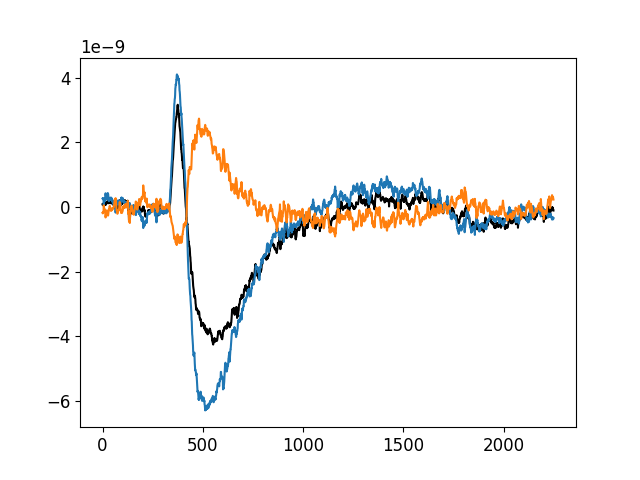

In [68]:
plt.figure()
plt.plot(np.sum(mean_layer_original[0],axis=0)/10,'k')
plt.plot(np.sum(mean_layer_L23Exc[0],axis=0)/10)
plt.plot(np.sum(L23Exc[0]/10,axis=0))

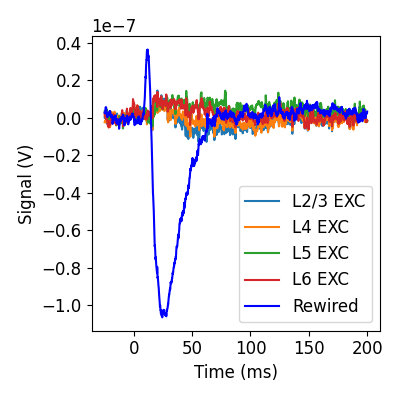

In [242]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

plt.plot(time,np.sum(L23ExcD[0],axis=0))
plt.plot(time,np.sum(L4ExcD[0],axis=0))
plt.plot(time,np.sum(L5ExcD[0],axis=0))
plt.plot(time,np.sum(L6ExcD[0],axis=0))

# plt.plot(np.sum(L23ExcD[0]/10,axis=0)+np.sum(L4ExcD[0]/10,axis=0)+np.sum(L5ExcD[0]/10,axis=0)+np.sum(L6ExcD[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 EXC','L4 EXC','L5 EXC','L6 EXC','Rewired'])

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewired.png',dpi=600)

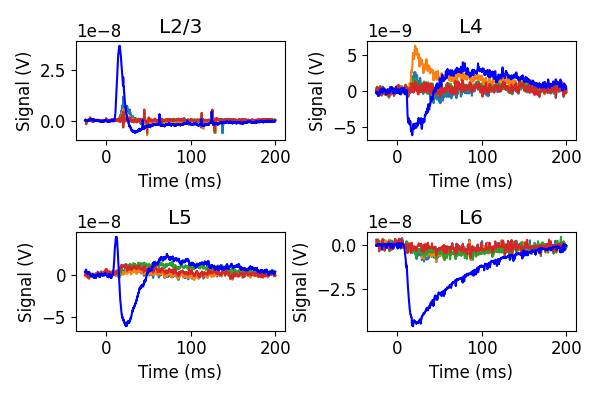

In [243]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23ExcD[0,layer,:])
    
    plt.plot(time,L4ExcD[0,layer,:])
    plt.plot(time,L5ExcD[0,layer,:])
    plt.plot(time,L6ExcD[0,layer,:])

    plt.plot(time,mean_layer_rewired_test[0,layer,:],'b')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewiredByLayer.png',dpi=600)

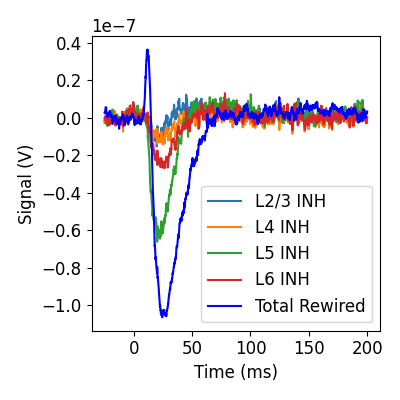

In [244]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

# plt.plot(time,np.sum(L1InhD[0]/10,axis=0))
plt.plot(time,np.sum(L23InhD[0],axis=0))
plt.plot(time,np.sum(L4InhD[0],axis=0))
plt.plot(time,np.sum(L5InhD[0],axis=0))
plt.plot(time,np.sum(L6InhD[0],axis=0))

# plt.plot(np.sum(L23InhD[0]/10,axis=0)+np.sum(L4InhD[0]/10,axis=0)+np.sum(L5InhD[0]/10,axis=0)+np.sum(L6InhD[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 INH','L4 INH','L5 INH','L6 INH','Total Rewired'])

plt.tight_layout()

plt.savefig('../../figures/CorticoCorticalRewiredInh.png',dpi=600)

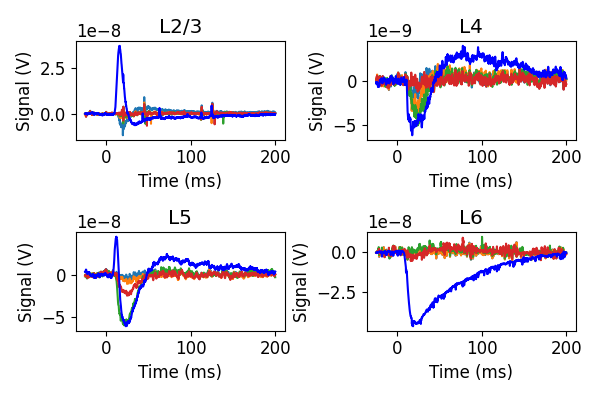

In [245]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23InhD[0,layer,:])
    
    plt.plot(time,L4InhD[0,layer,:])
    plt.plot(time,L5InhD[0,layer,:])
    plt.plot(time,L6InhD[0,layer,:])

    plt.plot(time,mean_layer_rewired_test[0,layer,:],'b')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewiredInhByLayer.png',dpi=600)

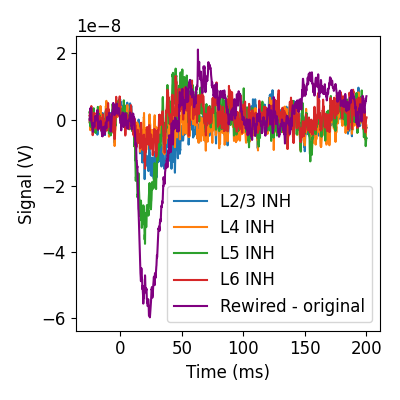

In [246]:
plt.figure(figsize=(4,4))

#plt.title('Difference in Cortico-cortical contribution by presnyaptic layer')

# plt.plot(np.sum(L1InhD[0]/10-L1Inh[0]/10,axis=0))
plt.plot(time,np.sum(L23InhD[0]-L23Inh[0],axis=0))
plt.plot(time,np.sum(L4InhD[0]-L4Inh[0],axis=0))
plt.plot(time,np.sum(L5InhD[0]-L5Inh[0],axis=0))
plt.plot(time,np.sum(L6InhD[0]-L6Inh[0],axis=0))

# plt.plot(time,np.sum(L23InhD[0]/10,axis=0)+np.sum(L4InhD[0]/10,axis=0)+np.sum(L5InhD[0]/10,axis=0)+np.sum(L6InhD[0]/10,axis=0) - np.sum(L23Inh[0]/10,axis=0)-np.sum(L4Inh[0]/10,axis=0)-np.sum(L5Inh[0]/10,axis=0)-np.sum(L6Inh[0]/10,axis=0)+np.sum(L1InhD[0]/10-L1Inh[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0)-np.sum(mean_layer_test[0],axis=0),'purple')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()

plt.legend(['L2/3 INH','L4 INH','L5 INH','L6 INH','Rewired - original'])

plt.savefig('../../figures/Difference.png',dpi=600)


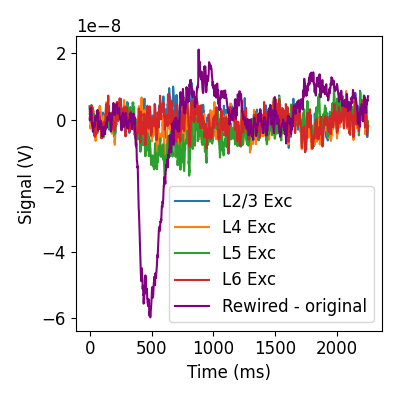

In [247]:
plt.figure(figsize=(4,4))

#plt.title('Difference in Cortico-cortical contribution by presnyaptic layer')

plt.plot(np.sum(L23ExcD[0]-L23Exc[0],axis=0))
plt.plot(np.sum(L4ExcD[0]-L4Exc[0],axis=0))
plt.plot(np.sum(L5ExcD[0]-L5Exc[0],axis=0))
plt.plot(np.sum(L6ExcD[0]-L6Exc[0],axis=0))

# plt.plot(np.sum(L23ExcD[0]/10,axis=0)+np.sum(L4ExcD[0]/10,axis=0)+np.sum(L5ExcD[0]/10,axis=0)+np.sum(L6ExcD[0]/10,axis=0) - np.sum(L23Exc[0]/10,axis=0)-np.sum(L4Exc[0]/10,axis=0)-np.sum(L5Exc[0]/10,axis=0)-np.sum(L6Exc[0]/10,axis=0),'k:')

plt.plot(np.sum(mean_layer_rewired_test[0],axis=0)-np.sum(mean_layer_test[0],axis=0),'purple')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()

plt.legend(['L2/3 Exc','L4 Exc','L5 Exc','L6 Exc','Rewired - original'])
plt.savefig('../../figures/DifferenceExc.png',dpi=600)

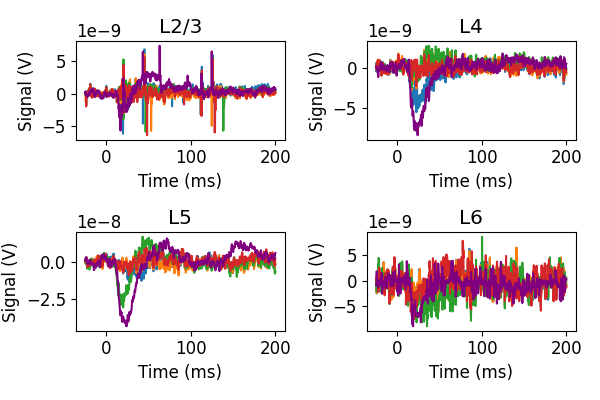

In [248]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23InhD[0,layer,:]-L23Inh[0,layer,:])
    
    plt.plot(time,L4InhD[0,layer,:]-L4Inh[0,layer,:])
    plt.plot(time,L5InhD[0,layer,:]-L5Inh[0,layer,:])
    plt.plot(time,L6InhD[0,layer,:]-L6Inh[0,layer,:])

    plt.plot(time,mean_layer_rewired_test[0,layer,:]-mean_layer_test[0,layer,:],'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/DifferenceByLayer.png',dpi=600)

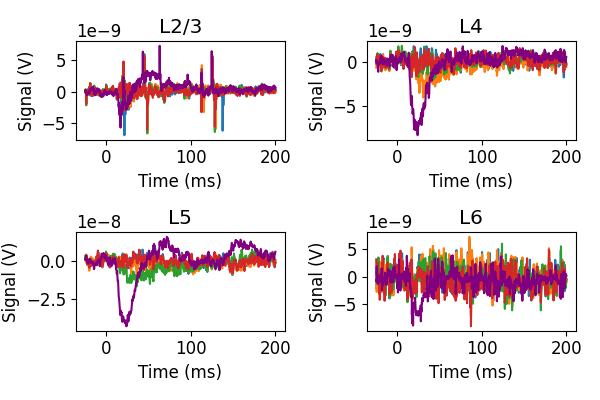

In [249]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23ExcD[0,layer,:]-L23Exc[0,layer,:])
    
    plt.plot(time,L4ExcD[0,layer,:]-L4Exc[0,layer,:])
    plt.plot(time,L5ExcD[0,layer,:]-L5Exc[0,layer,:])
    plt.plot(time,L6ExcD[0,layer,:]-L6Exc[0,layer,:])

    plt.plot(time,mean_layer_rewired_test[0,layer,:]-mean_layer_test[0,layer,:],'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/DifferenceByLayerExc.png',dpi=600)

In [48]:
L23InhD.shape

(2, 7, 2250)

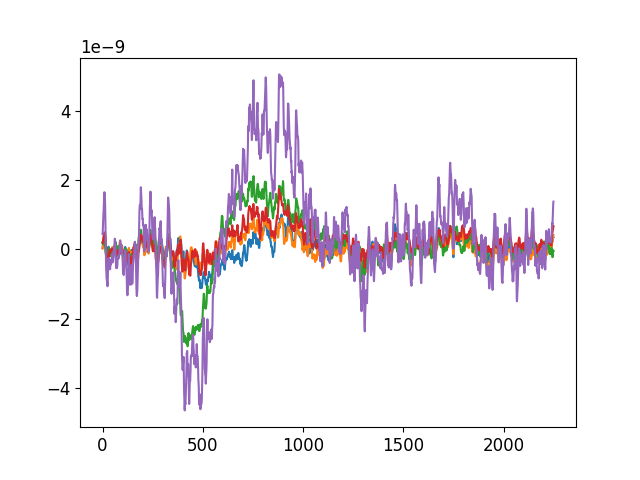

In [84]:
plt.figure()
plt.plot(L23InhD[0,5,:]/10-L23Inh[0,5,:]/10)#+L4InhD[0,5,:]/10-L4Inh[0,5,:]/10+L5InhD[0,5,:]/10-L5Inh[0,5,:]/10+L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)
plt.plot(L4InhD[0,5,:]/10-L4Inh[0,5,:]/10)
plt.plot(L5InhD[0,5,:]/10-L5Inh[0,5,:]/10)
plt.plot(L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)
plt.plot(L23InhD[0,5,:]/10-L23Inh[0,5,:]/10+L4InhD[0,5,:]/10-L4Inh[0,5,:]/10+L5InhD[0,5,:]/10-L5Inh[0,5,:]/10+L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)


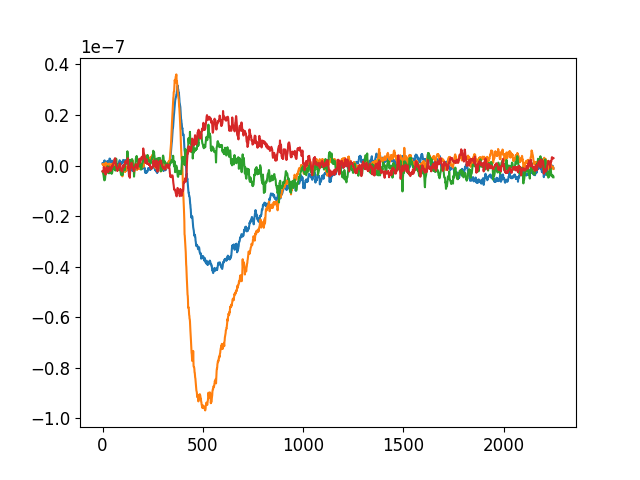

In [50]:
plt.figure()
plt.plot(np.sum(mean_layer_original[0],axis=0))
plt.plot(np.sum(mean_layer_rewired[0],axis=0))
plt.plot(np.sum(contrib_rewired_MC[0],axis=0))
plt.plot(np.sum(contrib_MC[0],axis=0))

In [51]:
L5Inh.shape

(2, 7, 2250)

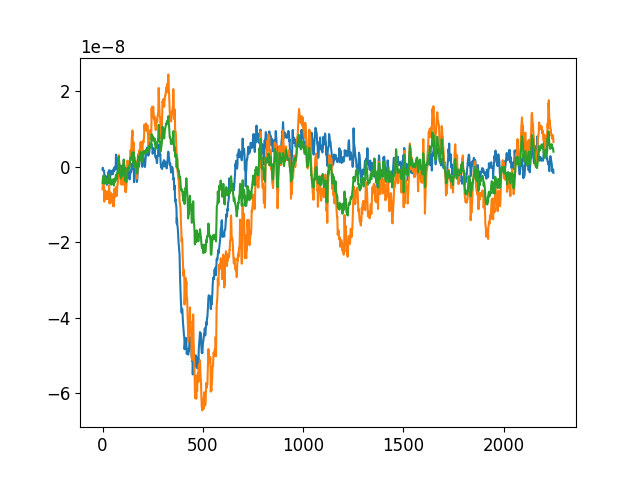

In [52]:
plt.figure()
plt.plot(np.sum(L5InhD[0],axis=0))
# plt.plot(np.sum(mean_layer_rewired[0],axis=0))
plt.plot(np.sum(contrib_rewired_LBC[0],axis=0)+np.sum(contrib_rewired_NBC[0],axis=0))
plt.plot(np.sum(contrib_rewired_NBC[0],axis=0))
# plt.plot(np.sum(contrib_LBC[0],axis=0))

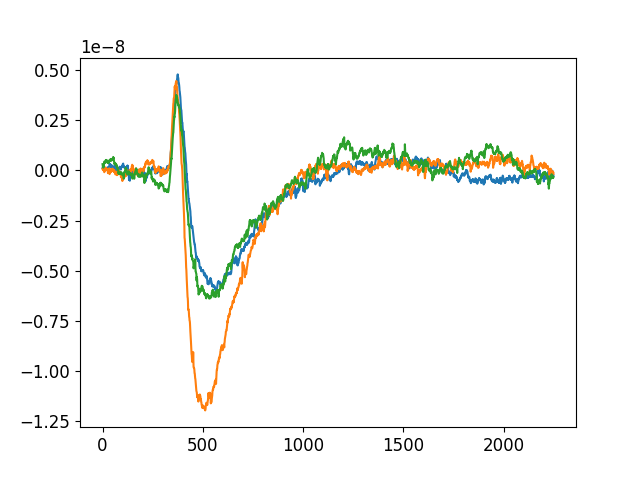

In [173]:
plt.figure()
plt.plot(np.sum(mean_layer_original[0],axis=0))
plt.plot(np.sum(mean_layer_rewired[0],axis=0))
plt.plot(np.sum(rewired_LBC[0],axis=0))
# plt.plot(np.sum(contrib_NBC[0],axis=0))

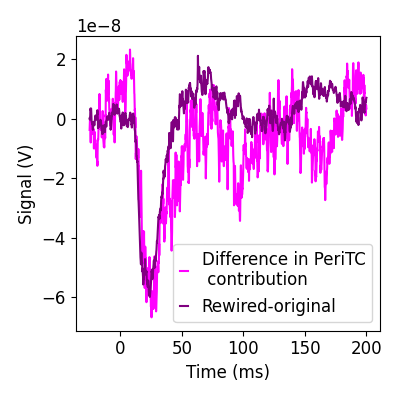

In [250]:
plt.figure(figsize=(4,4))

# plt.plot(np.sum(contrib_rewired_LBC[0]/10-contrib_LBC[0]/10,axis=0))
# plt.plot(np.sum(contrib_rewired_NBC[0]/10-contrib_NBC[0]/10,axis=0))

plt.plot(time,np.sum(contrib_rewired_LBC[0]-contrib_LBC[0],axis=0)+np.sum(contrib_rewired_NBC[0]-contrib_NBC[0],axis=0),'magenta')
plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0)-np.sum(mean_layer_test[0],axis=0),'purple')

plt.legend(['Difference in PeriTC\n contribution','Rewired-original'],handlelength=0.5)

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.tight_layout()
plt.savefig('../../figures/periTC.png',dpi=600)

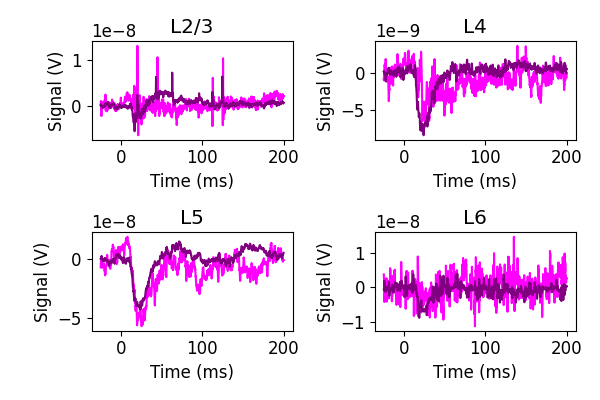

In [251]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))

    plt.plot(time,contrib_rewired_LBC[0,layer,:]-contrib_LBC[0,layer,:]+contrib_rewired_NBC[0,layer,:]-contrib_NBC[0,layer,:],'magenta')

    plt.plot(time,mean_layer_rewired_test[0,layer,:]-mean_layer_test[0,layer,:],'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/periTClayer.png',dpi=600)

In [252]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikes = sRewired.spikes.filter('L5_NBC').report
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)
        else:
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_NBC').report),axis=0)
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)

        numRewiredSims += 1

    except:
        pass


HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [33]:
numRewiredSims

9

In [253]:
for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikes = sOriginal.spikes.filter('L5_NBC').report
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_LBC').report),axis=0)
    else:
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_NBC').report),axis=0)
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_LBC').report),axis=0)

In [9]:
for i in range(10):
    
    sL23 = bp.Simulation(s12+'/'+str(i)+'/simulation_config.json')

    if i == 0:
        L23Spikes = sL23.spikes.filter().report
        L23Spikes = pd.concat((L23Spikes,sL23.spikes.filter().report),axis=0)
    else:
        L23Spikes = pd.concat((L23Spikes,sL23.spikes.filter().report),axis=0)
        L23Spikes = pd.concat((L23Spikes,sL23.spikes.filter().report),axis=0)

In [17]:
spikes

array([  43.925   ,   45.003025,   46.08105 , ..., 2197.81895 ,
       2198.896975, 2199.975   ])

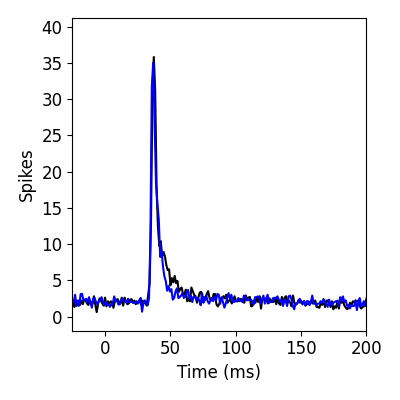

In [254]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikes.index,bins=2000)
binsD,spikesD = np.histogram(rewiredSpikes.index,bins=2000)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.tight_layout()
plt.savefig('../../figures/spiking.png',dpi=600)

In [31]:
for i in range(10):
    
    sDisconnected = bp.Simulation(s3+'/'+str(i)+'/simulation_config.json')

    if i == 0:
        disconnectedSpikes = sDisconnected.spikes.filter('L5_NBC').report
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_LBC').report),axis=0)
    else:
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_NBC').report),axis=0)
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_LBC').report),axis=0)

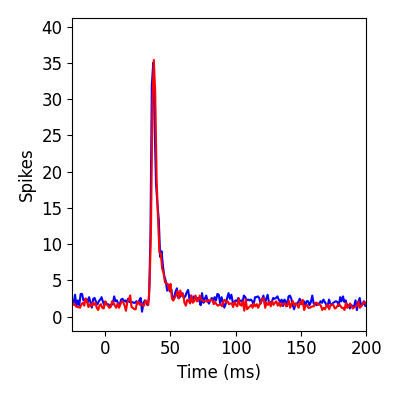

In [33]:
plt.figure(figsize=(4,4))
bins,spikes = np.histogram(rewiredSpikes.index,bins=2000)
binsO,spikesO = np.histogram(disconnectedSpikes.index,bins=2000)
plt.plot(spikes[1:]-1975,bins/9,'b')
plt.plot(spikesO[1:]-1975,binsO/10,'r')
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.tight_layout()
plt.savefig('../../figures/spiking_disconnected.png',dpi=600)